In [2]:
library(patchwork)
library(viridis)


#####################
## Define settings ##
#####################
here::i_am("processing/1_create_seurat_rna.R")
source(here::here("settings.R"))
source(here::here("utils.R"))

here() starts at /rds/project/rds-SDzz0CATGms/users/bt392/01_Eomes_RNA/code



In [3]:
args = list()
args$sce <- io$rna.sce
args$metadata <- file.path(io$basedir,"results/rna/mapping/sample_metadata_after_mapping.txt.gz")
args$atlas_metadata <- "/rds/project/rds-SDzz0CATGms/users/bt392/atlasses/extended/sample_metadata.txt.gz"
args$outdir <- file.path(io$basedir,"results/rna/plots")
dir.create(args$outdir, recursive=TRUE, showWarnings = FALSE)


In [4]:
##########################
## Load sample metadata ##
##########################

sample_metadata <- fread(args$metadata) %>%
   .[pass_rnaQC==TRUE & doublet_call==FALSE]

In [5]:
table(sample_metadata$tdTom)


FALSE  TRUE 
22600  9768 

In [ ]:


###############
## Load data ##
###############

# Load RNA expression data as SingleCellExperiment object
 sce <- load_SingleCellExperiment(args$sce, cells=sample_metadata$cell, normalise = TRUE)

# # Add sample metadata as colData
 colData(sce) <- sample_metadata %>% tibble::column_to_rownames("cell") %>% DataFrame

In [5]:
# Atlas umap
umap_atlas = fread(args$atlas_metadata)[,c('cell', 'umapX', 'umapY', 'celltype')]
umap_mapped = data.table(actual_cell = sample_metadata$cell, cell = sample_metadata$closest.cell_mnn) %>% 
    .[,idx:=1:nrow(.)] %>%
    merge(umap_atlas, by='cell') %>% 
    .[order(idx), c('actual_cell', 'umapX', 'umapY')] %>% 
    tibble::column_to_rownames("actual_cell") %>% tibble::rownames_to_column("cell")

In [6]:
meta = sample_metadata %>%
    merge(umap_mapped, by='cell') 

In [105]:
# plot mapped celltypes
p = ggplot(meta, aes(umapX, umapY, col=celltype.mapped_mnn)) + 
    geom_point(data=umap_atlas[sample(nrow(umap_atlas), nrow(umap_atlas)/10)], aes(umapX, umapY), col='gray90') +
    geom_point(alpha=0.6) +
    scale_color_manual(values=opts$celltype.colors) + 
    xlim(min(umap_atlas$umapX), max(umap_atlas$umapX)) + ylim(min(umap_atlas$umapY), max(umap_atlas$umapY)) +
    ggtitle('celltype mapped') + 
    theme_void() + theme(legend.position='none')

outfile <- file.path(args$outdir,'celltypes_umap.pdf')
pdf(outfile, width=8, height=8)
 p
dev.off()

# plot mapping scores
p = ggplot(meta, aes(umapX, umapY, col=celltype.score_mnn)) + 
    geom_point(data=umap_atlas[sample(nrow(umap_atlas), nrow(umap_atlas)/10)], aes(umapX, umapY), col='gray90') +
    geom_point(alpha=0.6) +
    scale_color_viridis() + 
    xlim(min(umap_atlas$umapX), max(umap_atlas$umapX)) + ylim(min(umap_atlas$umapY), max(umap_atlas$umapY)) +
    ggtitle('stages') + 
    theme_void() 

outfile <- file.path(args$outdir,'mapping_score_umap.pdf')
pdf(outfile, width=8, height=8)
 p
dev.off()

# plot stages
p = ggplot(meta, aes(umapX, umapY, col=stage)) + 
    geom_point(data=umap_atlas[sample(nrow(umap_atlas), nrow(umap_atlas)/10)], aes(umapX, umapY), col='gray90') +
    geom_point(alpha=0.6) +
    scale_color_manual(values=opts$stage.colors) + 
    xlim(min(umap_atlas$umapX), max(umap_atlas$umapX)) + ylim(min(umap_atlas$umapY), max(umap_atlas$umapY)) +
    ggtitle('stages') + 
    theme_void() + theme(legend.position='none')

outfile <- file.path(args$outdir,'stages_umap.pdf')
pdf(outfile, width=8, height=8)
 p
dev.off()

# plot tdTomato 
p = ggplot(meta, aes(umapX, umapY, col=tdTom_corr)) + 
    geom_point(data=umap_atlas[sample(nrow(umap_atlas), nrow(umap_atlas)/10)], aes(umapX, umapY), col='gray90') +
    geom_point(alpha=0.6) +
    scale_color_manual(values=opts$tdTom.color) + 
    xlim(min(umap_atlas$umapX), max(umap_atlas$umapX)) + ylim(min(umap_atlas$umapY), max(umap_atlas$umapY)) +
    ggtitle('TdTomato') + 
    theme_void() + theme(legend.position='none')

outfile <- file.path(args$outdir,'tdTom_umap.pdf')
pdf(outfile, width=8, height=8)
 p
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

In [100]:
p = list()
for(stages in sort(unique(meta$stage))){
p1 = ggplot(meta[stage == stages,], aes(umapX, umapY, col=celltype.mapped_mnn)) + 
    geom_point(data=umap_atlas[sample(nrow(umap_atlas), nrow(umap_atlas)/10)], aes(umapX, umapY), col='gray90') +
    geom_point(alpha=0.6) +
    scale_color_manual(values=opts$celltype.colors) + 
    xlim(min(umap_atlas$umapX), max(umap_atlas$umapX)) + ylim(min(umap_atlas$umapY), max(umap_atlas$umapY)) +
    ggtitle(stages) + 
    theme_void() + theme(legend.position='none')
    
p2 = ggplot(meta[stage == stages,], aes(umapX, umapY, col=tdTom_corr)) + 
    geom_point(data=umap_atlas[sample(nrow(umap_atlas), nrow(umap_atlas)/10)], aes(umapX, umapY), col='gray90') +
    geom_point(alpha=0.6) +
    scale_color_manual(values=opts$tdTom.color) + 
    xlim(min(umap_atlas$umapX), max(umap_atlas$umapX)) + ylim(min(umap_atlas$umapY), max(umap_atlas$umapY)) +
    ggtitle(stages) + 
    theme_void() + theme(legend.position='none')
p[[stages]] = p1 + p2
    }

In [20]:
celltype_proportions = meta %>% copy() %>%
    .[,Ntot := .N, by = c('stage.mapped_mnn', 'tdTom')] %>%
    .[,proportion := .N/Ntot, by = c('stage.mapped_mnn', 'tdTom', 'celltype.mapped_mnn')] %>% 
    unique(by = c('stage.mapped_mnn', 'tdTom', 'celltype.mapped_mnn')) %>% 
   # .[,celltype_v1 := factor(celltype_v1, levels = rev(c('Primitive_Streak', 'Early_Mes_EOd', 
   #                                                  'HE_Precursor','Blood_Progenitor', 'HE','Endothelium',   'Early_Mes_EOi',
   #                                                   'Allantois','Allantois_Precursor','Posterior_Mes', 'Mesenchyme'
   #                                                   )))] %>% 
    .[,stage.mapped_mnn := factor(stage.mapped_mnn, levels = c("E6.5" ,
                                        "E6.75",
                                        "E7.0" ,
                                        "E7.25",
                                        "E7.5" ,
                                        "E7.75",
                                        "E8.0" ,
                                        "E8.25",
                                        "E8.5" ))] %>%
    .[, c('stage.mapped_mnn', 'tdTom', 'celltype.mapped_mnn', 'proportion')]

all = expand.grid(unique(celltype_proportions$stage.mapped_mnn), unique(celltype_proportions$tdTom), unique(celltype_proportions$celltype.mapped_mnn)) %>%
    setnames(c('stage.mapped_mnn', 'tdTom', 'celltype.mapped_mnn'))

celltype_proportions = merge(celltype_proportions, all, by = c('stage.mapped_mnn', 'tdTom', 'celltype.mapped_mnn'), all=TRUE) %>% 
    .[,proportion:= ifelse(is.na(proportion), 0, proportion)] %>%
   # .[,proportion:= ifelse(genotype=='KO' & day == 'D3', .[genotype=='WT' & day == 'D3', proportion], proportion)] %>% 
    .[,tdTom:=gsub(FALSE, 'WT', gsub(TRUE, 'Eomes KO', tdTom))] %>% 
    .[,tdTom:=factor(tdTom, levels=c('WT', 'Eomes KO'))]

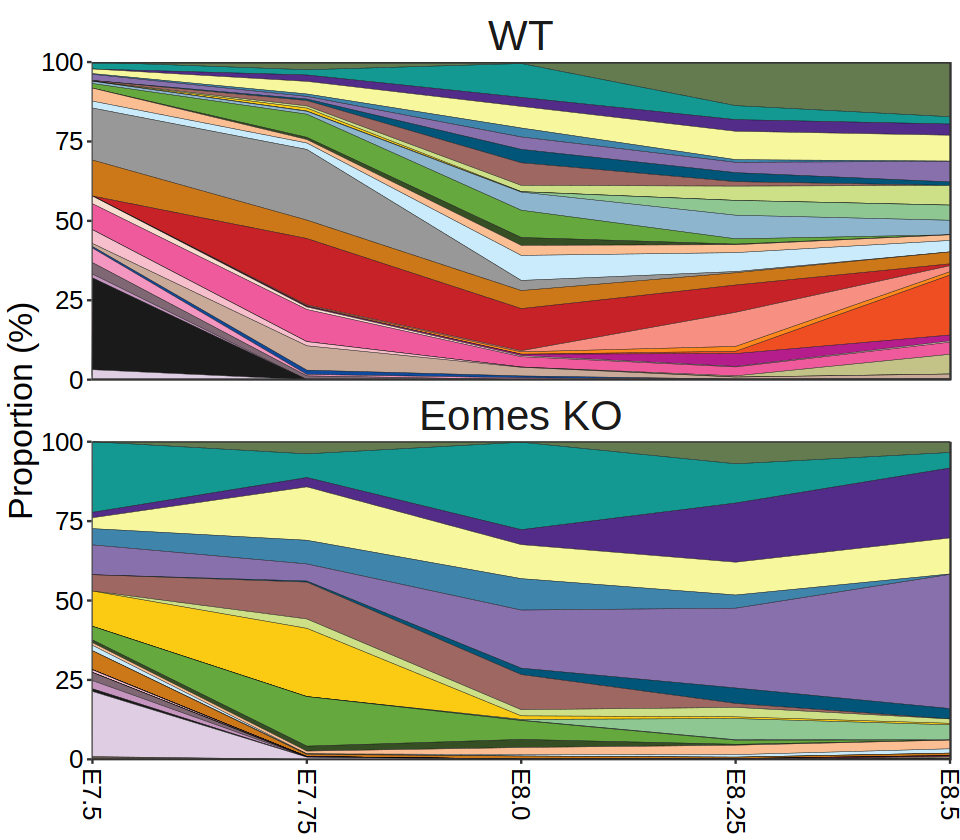

In [21]:
options(repr.plot.width=8, repr.plot.height=7)
p = ggplot(celltype_proportions, aes(stage.mapped_mnn, proportion*100, group=celltype.mapped_mnn, fill=celltype.mapped_mnn)) + 
    geom_area(color='black', size=0.1) + 
    scale_fill_manual(values=opts$celltype.colors, name = 'Celltype') + 
    ylab('Proportion (%)') +
      scale_x_discrete(expand = c(0, 0)) +
      scale_y_continuous(expand = c(0, 0)) +
    facet_wrap(~tdTom, ncol=1) + 
    theme_bw() + 
    theme(strip.background = element_blank(),
          strip.text = element_text(size=25),
          axis.text = element_text(size=15, color='black'),
          axis.text.x = element_text(angle=-90, hjust=0, vjust=0.5),
          axis.title.y = element_text(size=20),
          axis.title.x = element_blank(),
          legend.text = element_text(size=15, color='black'),
          legend.title = element_text(size=20),
         legend.position='none')
p

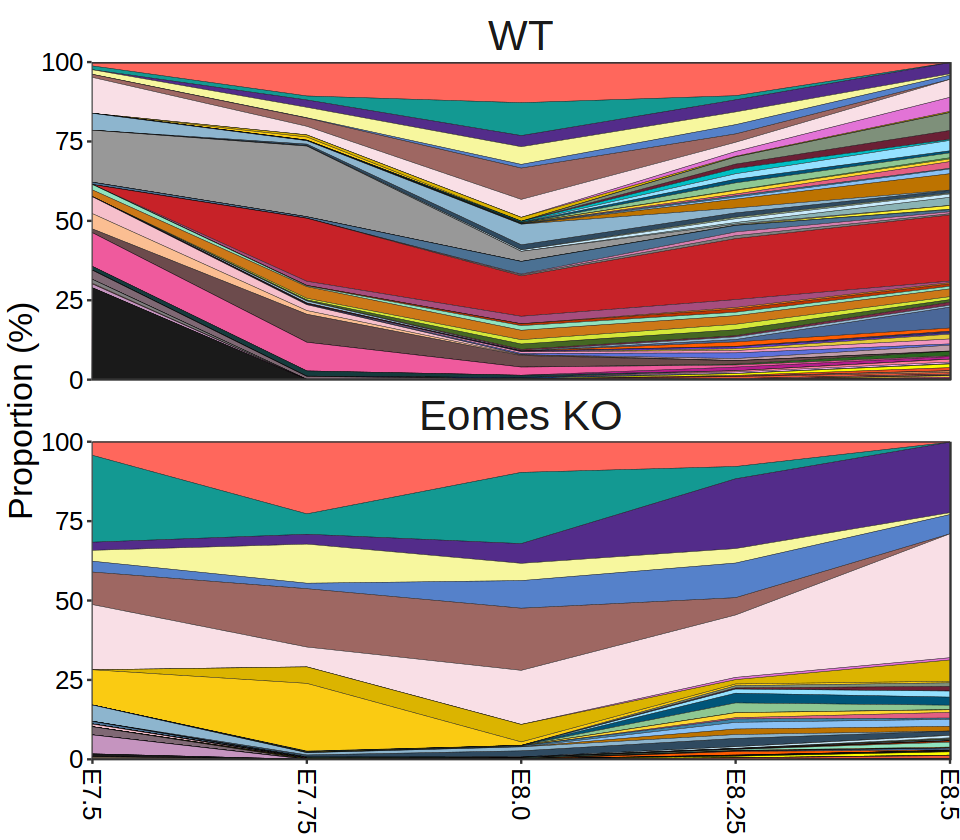

In [27]:
celltype_proportions = meta %>% copy() %>%
    .[,Ntot := .N, by = c('stage.mapped_mnn', 'tdTom')] %>%
    .[,proportion := .N/Ntot, by = c('stage.mapped_mnn', 'tdTom', 'celltype_extended.mapped_mnn')] %>% 
    unique(by = c('stage.mapped_mnn', 'tdTom', 'celltype_extended.mapped_mnn')) %>% 
   # .[,celltype_v1 := factor(celltype_v1, levels = rev(c('Primitive_Streak', 'Early_Mes_EOd', 
   #                                                  'HE_Precursor','Blood_Progenitor', 'HE','Endothelium',   'Early_Mes_EOi',
   #                                                   'Allantois','Allantois_Precursor','Posterior_Mes', 'Mesenchyme'
   #                                                   )))] %>% 
    .[,stage.mapped_mnn := factor(stage.mapped_mnn, levels = c("E6.5" ,
                                        "E6.75",
                                        "E7.0" ,
                                        "E7.25",
                                        "E7.5" ,
                                        "E7.75",
                                        "E8.0" ,
                                        "E8.25",
                                        "E8.5" ))] %>%
    .[, c('stage.mapped_mnn', 'tdTom', 'celltype_extended.mapped_mnn', 'proportion')]

all = expand.grid(unique(celltype_proportions$stage.mapped_mnn), unique(celltype_proportions$tdTom), unique(celltype_proportions$celltype_extended.mapped_mnn)) %>%
    setnames(c('stage.mapped_mnn', 'tdTom', 'celltype_extended.mapped_mnn'))

celltype_proportions = merge(celltype_proportions, all, by = c('stage.mapped_mnn', 'tdTom', 'celltype_extended.mapped_mnn'), all=TRUE) %>% 
    .[,proportion:= ifelse(is.na(proportion), 0, proportion)] %>%
   # .[,proportion:= ifelse(genotype=='KO' & day == 'D3', .[genotype=='WT' & day == 'D3', proportion], proportion)] %>% 
    .[,tdTom:=gsub(FALSE, 'WT', gsub(TRUE, 'Eomes KO', tdTom))] %>% 
    .[,tdTom:=factor(tdTom, levels=c('WT', 'Eomes KO'))]

options(repr.plot.width=8, repr.plot.height=7)
p = ggplot(celltype_proportions, aes(stage.mapped_mnn, proportion*100, group=celltype_extended.mapped_mnn, fill=celltype_extended.mapped_mnn)) + 
    geom_area(color='black', size=0.1) + 
    scale_fill_manual(values=opts$celltype_extended.colors, name = 'Celltype') + 
    ylab('Proportion (%)') +
      scale_x_discrete(expand = c(0, 0)) +
      scale_y_continuous(expand = c(0, 0)) +
    facet_wrap(~tdTom, ncol=1) + 
    theme_bw() + 
    theme(strip.background = element_blank(),
          strip.text = element_text(size=25),
          axis.text = element_text(size=15, color='black'),
          axis.text.x = element_text(angle=-90, hjust=0, vjust=0.5),
          axis.title.y = element_text(size=20),
          axis.title.x = element_blank(),
          legend.text = element_text(size=15, color='black'),
          legend.title = element_text(size=20),
         legend.position='none')
p

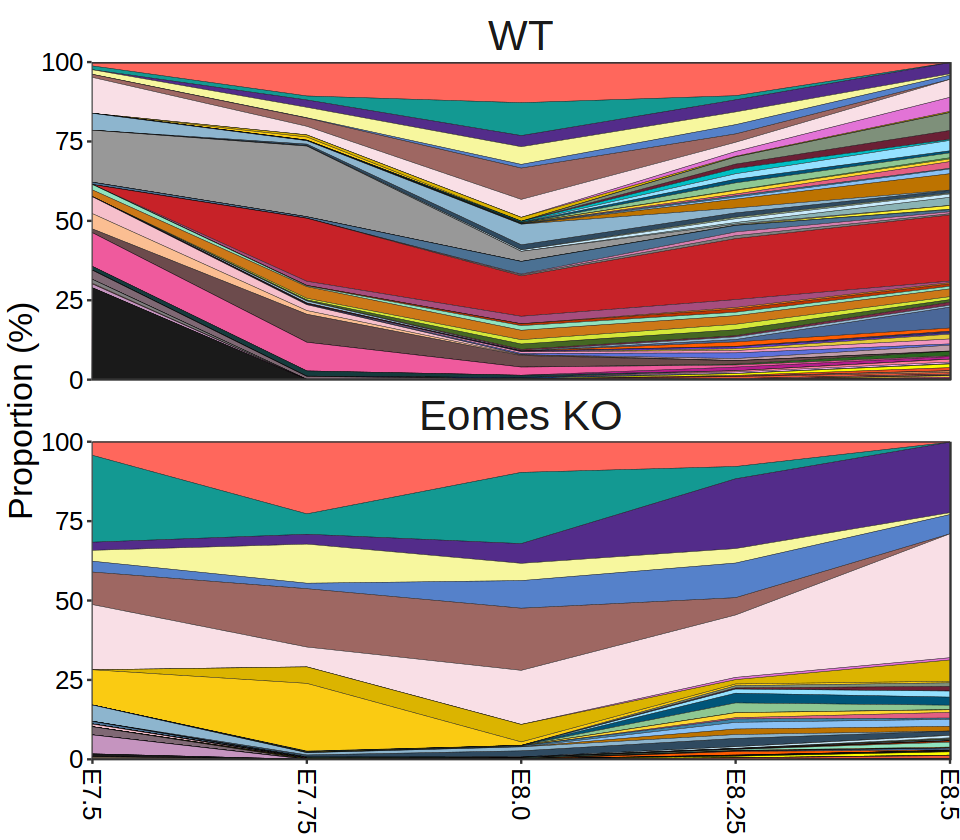

In [27]:
celltype_proportions = meta %>% copy() %>%
    .[,Ntot := .N, by = c('stage.mapped_mnn', 'tdTom')] %>%
    .[,proportion := .N/Ntot, by = c('stage.mapped_mnn', 'tdTom', 'celltype_extended.mapped_mnn')] %>% 
    unique(by = c('stage.mapped_mnn', 'tdTom', 'celltype_extended.mapped_mnn')) %>% 
   # .[,celltype_v1 := factor(celltype_v1, levels = rev(c('Primitive_Streak', 'Early_Mes_EOd', 
   #                                                  'HE_Precursor','Blood_Progenitor', 'HE','Endothelium',   'Early_Mes_EOi',
   #                                                   'Allantois','Allantois_Precursor','Posterior_Mes', 'Mesenchyme'
   #                                                   )))] %>% 
    .[,stage.mapped_mnn := factor(stage.mapped_mnn, levels = c("E6.5" ,
                                        "E6.75",
                                        "E7.0" ,
                                        "E7.25",
                                        "E7.5" ,
                                        "E7.75",
                                        "E8.0" ,
                                        "E8.25",
                                        "E8.5" ))] %>%
    .[, c('stage.mapped_mnn', 'tdTom', 'celltype_extended.mapped_mnn', 'proportion')]

all = expand.grid(unique(celltype_proportions$stage.mapped_mnn), unique(celltype_proportions$tdTom), unique(celltype_proportions$celltype_extended.mapped_mnn)) %>%
    setnames(c('stage.mapped_mnn', 'tdTom', 'celltype_extended.mapped_mnn'))

celltype_proportions = merge(celltype_proportions, all, by = c('stage.mapped_mnn', 'tdTom', 'celltype_extended.mapped_mnn'), all=TRUE) %>% 
    .[,proportion:= ifelse(is.na(proportion), 0, proportion)] %>%
   # .[,proportion:= ifelse(genotype=='KO' & day == 'D3', .[genotype=='WT' & day == 'D3', proportion], proportion)] %>% 
    .[,tdTom:=gsub(FALSE, 'WT', gsub(TRUE, 'Eomes KO', tdTom))] %>% 
    .[,tdTom:=factor(tdTom, levels=c('WT', 'Eomes KO'))]

options(repr.plot.width=8, repr.plot.height=7)
p = ggplot(celltype_proportions, aes(stage.mapped_mnn, proportion*100, group=celltype_extended.mapped_mnn, fill=celltype_extended.mapped_mnn)) + 
    geom_area(color='black', size=0.1) + 
    scale_fill_manual(values=opts$celltype_extended.colors, name = 'Celltype') + 
    ylab('Proportion (%)') +
      scale_x_discrete(expand = c(0, 0)) +
      scale_y_continuous(expand = c(0, 0)) +
    facet_wrap(~tdTom, ncol=1) + 
    theme_bw() + 
    theme(strip.background = element_blank(),
          strip.text = element_text(size=25),
          axis.text = element_text(size=15, color='black'),
          axis.text.x = element_text(angle=-90, hjust=0, vjust=0.5),
          axis.title.y = element_text(size=20),
          axis.title.x = element_blank(),
          legend.text = element_text(size=15, color='black'),
          legend.title = element_text(size=20),
         legend.position='none')
p